# 0. Introdução 

Nessa análise tive uma abordagem um pouco mais explicativa, em um formato similar ao de um tutorial ou artigo, voltada a um público que não tem familiaridade com a área dados. Escolhi isso por ser meu primeiro projeto de análise exploratória e por interesse em aproveitá-la para criar um artigo que será postado na plataforma Medium.

### Análise exploratória dos dados do FIFA 23

Primeiramente, precisamos entender o que é uma análise exploratória. A análise exploratória de dados (EDA) é o processo de examinar um conjunto de dados, buscando compreendê-lo de forma geral para entender suas principais características e padrões antes de aplicar técnicas mais avançadas de estatística ou de machine learning. Ele extremamente comum na rotina de Analistas e Cientistas de dados, sendo uma etapa bem importante nos projetos desenvolvidos desses profissionais. 


<b> Sobre os dados: </b> 
Os dados que iremos analisar são do video-game de futebol FIFA 23. Todos os registros são sobre os jogadores contidos no jogo, como, por exemplo: Nome, Idade, Nome do Clube, Valor, Salário, Nacionalidade e Overall. 

Um termo que será muito comum aqui será <b> Overall (também chamado de rating) </b>. Esse é o atributo principal de um jogador, que define sua qualidade geral. Ele varia normalmente entre 50 e 95, sendo que os considerados bons jogadores têm um valor de rating de 80 ou superior. Similiar a esse atributo, temos o <b> Overall potencial </b>, que é o valor de rating máximo, definido pelos desenvolvedores, que um jogador pode atingir em sua carreira. Ele costuma ser elevado para jogadores mais jovens e igual, ou pouco superior, para jogadores mais velhos. Além desses, existem diversos atributos que medem os atributos físicos, de habilidade e mentais dos atletas. Uma explicação mais detalhada sobre alguns deles pode ser encontrada neste link: https://fifauteam.com/fifa-23-attributes/ 

Importante lembrar que, o FIFA 23 não possui todos os jogadores profissionais registrados em sua base de dados (como os jogadores das ligas brasileiras, por exemplo), já que nem todas as ligas possuem contrato com a empresa desenvolvedora (EA Sports). Isso faz com que os dados não retratem 100% da realidade do futebol internacional, pois, além de não termos todos os atletas, naturalmente existem algumas imprecisões sobre a medição os atributos, e questionamentos se eles realmente correspondem as habilidades dos jogadores dentro de campo. 
Apesar dessas ressalvas, o Dataset (conjunto de dados) é bem completo e viável para ser feita uma boa análise.

Fonte dos dados: https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset 
Autor: Sanjeetsinghnaik (Usuário do site "Kaggle")

Para guiar nossa análise exploratória

<b> Perguntas e Hipóteses: </b>
- Quais países e clubes possuem maiores média de Overall?
- Quais são os clubes mais valiosos e com maior folha salarial?
- Quem são os jogadores mais habilidosos e rápidos do game?
- Quais atributos mais influenciam no rating de um jogador?
- Jogadores com estatísticas geral mais altas possuem maior Overall?
- Os brasileiros e sulamericanos são os mais habilidosos?

# 1. Carregando Bibliotecas e o Dataset

In [175]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("tab10")
plt.style.use('ggplot')

In [122]:
#Carregando dataset
df = pd.read_csv('Fifa 23 Players Data-Copy1.csv')
pd.set_option('display.max_columns', None)


#Removendo colunas desnecessárias para a análise
df.drop(['Image Link', 'National Team Image Link', 'National Team Jersey Number', 'Attacking Work Rate'
         , 'Defensive Work Rate', 'Contract Until', 'Joined On', 'On Loan', 'Skill Moves', 'Weak Foot Rating',
        'International Reputation'], 1, inplace = True)


#Mudando o nome de duas colunas para facilitar o uso
df.rename(columns={'Value(in Euro)':'Value','Wage(in Euro)':'Wage'}, inplace=True)


C:\Users\joaoi\AppData\Local\Temp\ipykernel_9980\212389229.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [123]:
df.head()

,Known As,Full Name,Overall,Potential,Value,Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage,Release Clause,Club Position,Club Jersey Number,Preferred Foot,National Team Name,National Team Position,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,30,Left,Argentina,RW,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,9,Right,France,ST,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,9,Right,Poland,ST,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,198900000,CM,17,Right,Belgium,RF,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,7,Right,France,ST,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [17]:
df.tail()

,Known As,Full Name,Overall,Potential,Value,Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage,Release Clause,Club Position,Club Jersey Number,Preferred Foot,National Team Name,National Team Position,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,1287,274,Sligo Rovers,500,193000,RES,20,Right,-,-,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,60,1289,267,Guangzhou FC,500,158000,SUB,30,Right,-,-,55,37,41,47,48,39,34,33,44,46,31,42,32,31,45,46,52,57,59,51,80,50,55,34,35,35,52,46,35,40,33,45,46,50,52,6,12,11,8,6,44,43,43,43,43,43,45,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,1333,277,Derry City,500,332000,SUB,38,Right,-,-,64,40,49,52,37,35,41,36,42,54,37,52,47,42,52,50,70,59,46,49,73,54,54,36,31,36,39,24,42,50,43,59,39,37,48,11,12,8,7,12,48,49,49,49,49,49,51,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,17,178,65,1113,226,Derry City,500,218000,SUB,37,Right,-,-,52,24,25,32,52,41,21,20,41,25,27,27,26,20,22,26,53,51,42,43,66,34,72,49,34,18,42,54,23,32,37,41,50,54,54,8,14,13,7,8,33,30,30,30,30,30,31,33,33,33,44,42,44,47,49,47,15
18538,N. Rabha,Nabin Rabha,47,50,60000,LB,LB,India,25,176,66,1277,269,NorthEast United FC,500,86000,RES,25,Left,-,-,61,29,35,46,44,54,38,28,41,35,29,47,33,32,29,38,70,53,58,45,76,29,66,56,55,28,47,40,36,39,35,32,47,44,43,13,13,6,14,14,41,42,40,40,40,42,42,44,40,44,46,43,46,47,47,47,19


# 3. Visão Geral

In [18]:
print("Este dataset possui {} linhas e {} colunas".format(df.shape[0],df.shape[1]))

Este dataset possui 18539 linhas e 78 colunas


In [19]:
#Valores únicos de cada coluna
df.nunique()

Known As      17530
Full Name     18337
Overall          45
Potential        48
Value           257
              ...  
RWB Rating       72
LB Rating        71
CB Rating        73
RB Rating        71
GK Rating        64
Length: 78, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 78 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Known As                18539 non-null  object
 1   Full Name               18539 non-null  object
 2   Overall                 18539 non-null  int64 
 3   Potential               18539 non-null  int64 
 4   Value                   18539 non-null  int64 
 5   Positions Played        18539 non-null  object
 6   Best Position           18539 non-null  object
 7   Nationality             18539 non-null  object
 8   Age                     18539 non-null  int64 
 9   Height(in cm)           18539 non-null  int64 
 10  Weight(in kg)           18539 non-null  int64 
 11  TotalStats              18539 non-null  int64 
 12  BaseStats               18539 non-null  int64 
 13  Club Name               18539 non-null  object
 14  Wage                    18539 non-null  int64 
 15  Re

In [21]:
df.isnull().sum()

Known As      0
Full Name     0
Overall       0
Potential     0
Value         0
             ..
RWB Rating    0
LB Rating     0
CB Rating     0
RB Rating     0
GK Rating     0
Length: 78, dtype: int64

O Dataset não possui valores nulos e nem dados a serem tratados. 67 colunas são do tipo inteiro e 11 do tipo objeto (palavras).

In [22]:
df.describe()

,Overall,Potential,Value,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage,Release Clause,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,68.017746,53.777874,58.024327,63.109553,50.241383,64.775338,49.476833,46.255300,51.846755,59.072226,42.513944,55.898754,47.695129,43.006689,53.568423,58.516263,64.725336,64.838341,63.518906,61.542586,64.059550,57.827661,64.795566,63.040455,65.152004,46.825719,55.668537,46.853282,50.520362,54.191542,47.994444,58.036625,46.747505,48.399159,46.264146,16.402125,16.157182,16.061007,16.205944,16.472895,56.725929,55.819138,55.714925,55.714925,55.714925,55.819138,57.950267,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,10.649511,13.619867,9.717950,9.336566,16.392532,9.577715,17.887405,19.623881,17.318947,14.287698,17.635249,18.751691,17.910205,16.997758,14.633838,16.590051,15.280849,15.108259,14.905330,8.900297,14.483193,12.949870,12.293523,16.269330,12.622774,19.362064,16.905505,20.666647,19.660034,13.478006,15.730026,12.036272,20.350228,21.191644,20.701146,17.589457,16.924266,16.680839,17.089109,17.927602,13.475267,14.632018,14.216500,14.216500,14.216500,14.632018,13.905442,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,3.000000,3.000000,6.000000,4.000000,9.000000,5.000000,14.000000,15.000000,18.000000,30.000000,20.000000,18.000000,22.000000,14.000000,25.000000,4.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,62.000000,44.000000,52.000000,58.000000,36.000000,58.000000,39.000000,31.000000,44.000000,55.000000,30.000000,51.000000,36.000000,32.000000,45.000000,55.000000,57.000000,57.000000,55.000000,56.000000,56.00

Agora que temos uma visão geral sobre como os dados são, podemos analisar de forma mais específica, começando pela análise univariada.

# 4. Análise Univariada

Análise de certas variáveis individualmente, vendo suas quantidades e distribuições. 

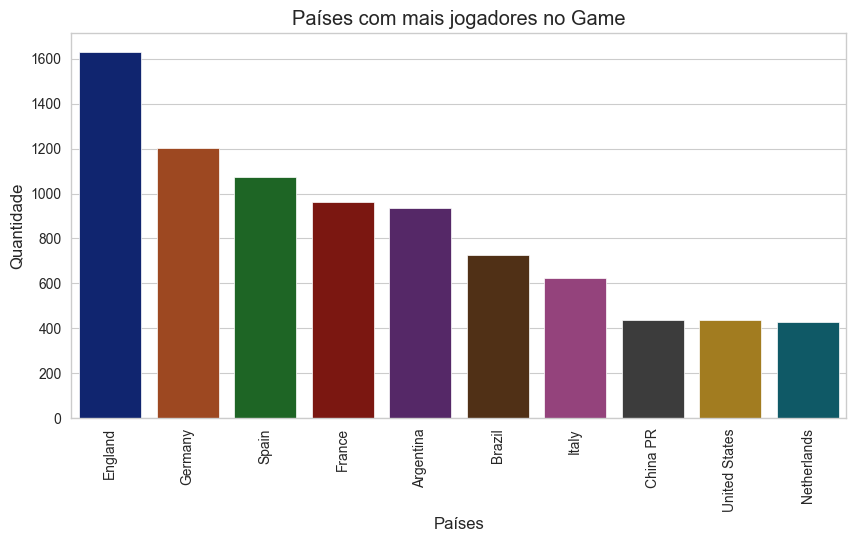

In [25]:
#Mundando o estilo
sns.set_style("whitegrid")

#Criando um gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=df.Nationality.value_counts().head(10).index, y=df.Nationality.value_counts().head(10).values, palette="dark")
plt.xlabel("Países")
plt.ylabel("Quantidade")
plt.title("Países com mais jogadores no Game")
plt.xticks(rotation=90)
plt.show()


O Fato de a Inglaterra possuir mais jogadores registrados não quer dizer necessariamente que o país possui a maior quantidade de jogadores profissionais - apesar dos vários indícios para isso. Essa grande quantidade existe porque existem muitas ligas inglesas inferiores cadastradas no jogo. Ao contrário, por exemplo, do Brasil, que possui não possui nenhuma liga nacional registrada de forma oficial (apenas com alguns jogadores gerados pelo jogo).

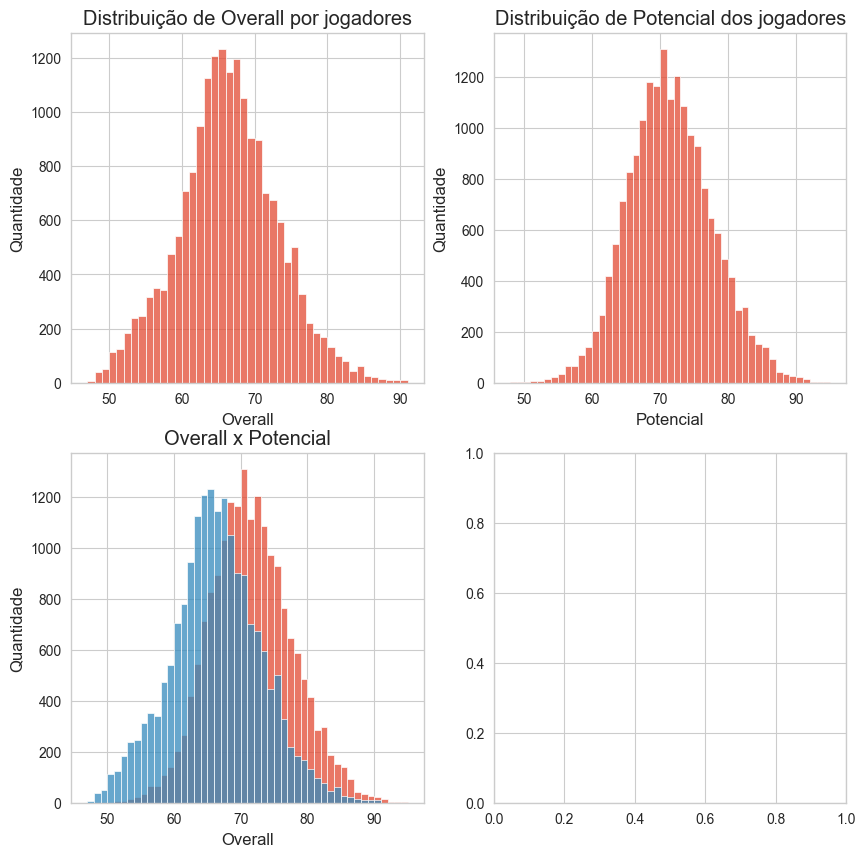

In [153]:
#Criando uma função que gera um conjunto de gráficos
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

#Criando histogramas
sns.histplot(x=df['Overall'], ax=ax[0][0],  binwidth = 1)
sns.histplot(x=df['Potential'], ax=ax[0][1],  binwidth = 1)
sns.histplot(x=df['Potential'], ax=ax[1][0],  binwidth = 1)
sns.histplot(x=df['Overall'], ax=ax[1][0],  binwidth = 1, legend = True)

#Editando os gráficos
ax[0][0].set(title="Distribuição de Overall por jogadores", xlabel="Overall", ylabel = 'Quantidade')
ax[0][1].set(title="Distribuição de Potencial dos jogadores", xlabel="Potencial", ylabel = 'Quantidade')
ax[1][0].set(title="Overall x Potencial", xlabel="Overall", ylabel = 'Quantidade')


plt.show()

Para vermos os jogadores com <b> maiores ratings por posição </b> , criei duas funções: uma para achar o nome e outro o rating do jogador. Por fim criando uma tabela (DataFrame) com todas essas informações.

In [12]:
#Função para retornar os nomes do jogadores
def get_max_name(df, col):   
    return df.iloc[df[col].idxmax(), 0]

#Função para retornar os maiores ratings 
def get_max_rat(df, col):
    return list(df.loc[df[col].max(), col].index)

#Criando variáveis com os nomes e ratings maiores
max_names = get_max_name(df,df.columns[61:78])
max_rats = get_max_rat(df, df.columns[61:78])

#Criando Dataframe com as variáveis importantes
top_ply = pd.DataFrame({'Jogador':max_names, 'Posição': df.columns[61:78], 'Rating' : max_rats})
top_ply

,Jogador,Posição,Rating
4,K. Mbappé,ST Rating,92
0,L. Messi,LW Rating,90
0,L. Messi,LF Rating,91
0,L. Messi,CF Rating,91
0,L. Messi,RF Rating,91
0,L. Messi,RW Rating,90
4,K. Mbappé,CAM Rating,92
4,K. Mbappé,LM Rating,92
3,K. De Bruyne,CM Rating,91
4,K. Mbappé,RM Rating,92


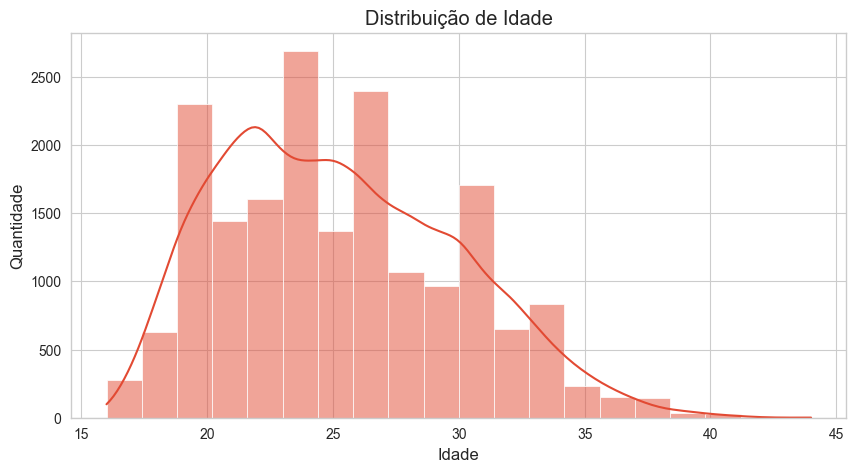

In [46]:
#Criando histograma para ver a distribuição de idade
plt.figure(figsize=(10,5))
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.show()

Diversos jogadores podem atuar bem em posições diferentes, mas vamos ver quais são as mais comuns pelo atributo "Best Position", que contém a melhor posição que os atletas podem atuar.

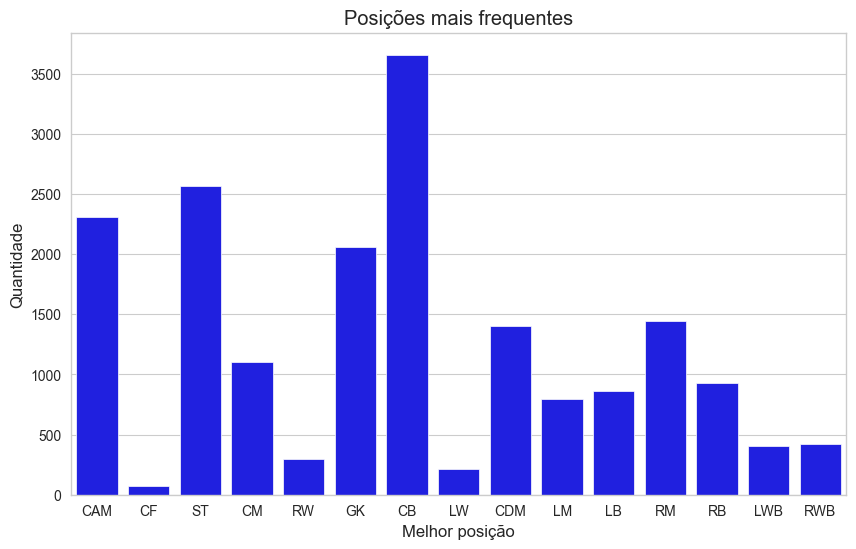

In [47]:
#Criando gráfico com as posições mais frequentes no jogo
plt.figure(figsize=(10,6))
sns.countplot(x = 'Best Position', data = df, color = 'blue')
plt.xlabel('Melhor posição')
plt.ylabel('Quantidade')
plt.title('Posições mais frequentes')
plt.show()

Vemos que, as quatro posições com mais jogadores especialistas são CB (Center back) que significa zagueiro, ST (Striker) atacante, CAM (Central Attack Midfielder) meio-campista avançado e GK (Goalkeeper). 

Para verificarmos quais países possuem as maiores médias de overall, temos que nos atentar ao fato de que existem alguns países com poucos jogadores, fazendo com que eles tenham uma média maior mesmo sem possuir realmente bons jogadores ou alguma relevância no esporte. Por isso, analisaremos apenas as médias de países possuem pelo menos 150 jogadores no jogo. 
Para isso, criei um dataframe (dfb) com as nações e a quantidade de jogadores em cada uma para poder extrair apenas seus nomes e aplicar a função "isin", selecionando só jogadores dessas nações.

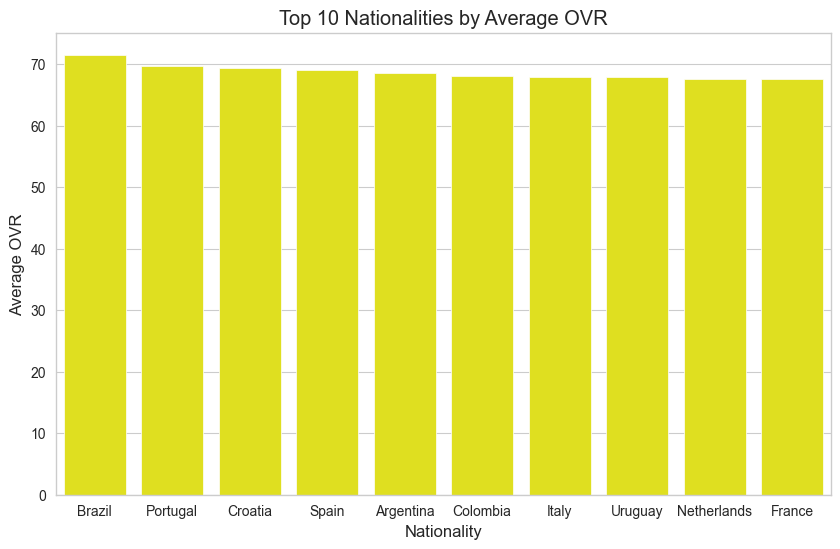

In [174]:
# Criando dataframe com países de pelo menos 150 jogadores
dfb = df.groupby("Nationality").size().reset_index(name='counts')
dfb = dfb[dfb['counts'] > 150]

# Lista contendo os países com mais de 150 jogadores
b = dfb.iloc[:, 0]
dfb = df[df['Nationality'].isin(b)]

# Gerando gráfico
ovr_nat = dfb.groupby('Nationality').Overall.mean().sort_values(ascending = False).head(10)

fig = plt.gcf()
fig.set_size_inches(10, 6)
fig5 = sns.barplot(x=ovr_nat.index, y=ovr_nat.values, color = 'yellow')
fig5.set(xlabel='Nationality', ylabel='Average OVR')
fig5.set_title('Top 10 Nationalities by Average OVR')

plt.show()

Mesmo filtrando os países, ainda temos países com médias que não condizem exatamente com a qualidade geral de suas seleções. Isso acontece porque, como vimos anteriormente, países com França, Alemanha e Inglaterra (três dos mais tradicionais) têm muitos jogadores, o que os faz ter uma média de Overall menor, já que têm jogadores em ligar inferiores.
Outra forma de atingir o mesmo objetivo (talvez até melhor) é contar a quantidade de jogadores com mais de 70 de Overall por cada país. Dessa forma, temos um retrato mais fiel da realidade, com os países considerados mais talentosos acima - incluindo o Brasil em primeiro :).

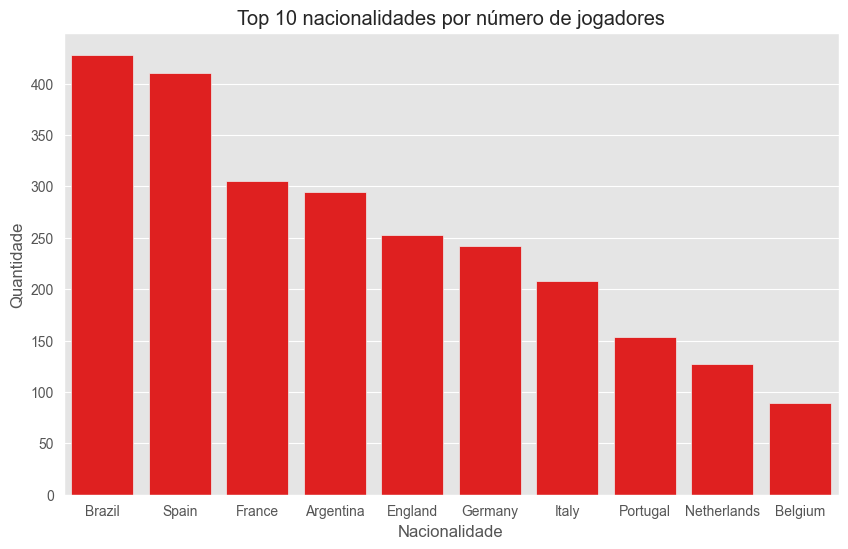

In [179]:
#Criando dataframe com apenas jogadores de pelo menos 70 de Overall e de países com pelo menos 150 jogadores
dfb = df.groupby("Nationality").size().reset_index(name='counts')
dfc = dfb[dfb['counts'] > 150]
dfc = df[df['Nationality'].isin(dfb['Nationality'])]
dfc = dfc[dfc['Overall'] > 70]

#Criando variável com a quantidade de jogadores por país e um gráfico de barras
ovr_count = dfc['Nationality'].value_counts()
sns.set_color_codes("bright")
sns.barplot(x=ovr_count.head(10).index, y=ovr_count.head(10).values, color="red")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel('Nacionalidade')
plt.ylabel('Quantidade')
plt.title('Top 10 nacionalidades por número de jogadores')
plt.show()

Seguindo a mesma métrica, veremos os países com maior overall potencial (promessas), ou seja, os que têm mais jogadores promissores, que o FIFA prevê que iram evoluir mais no futuro e se tornarem bons jogadores. Escolheremos apenas os que tem potencial maior que 80 e que possuem menos de 23 anos.

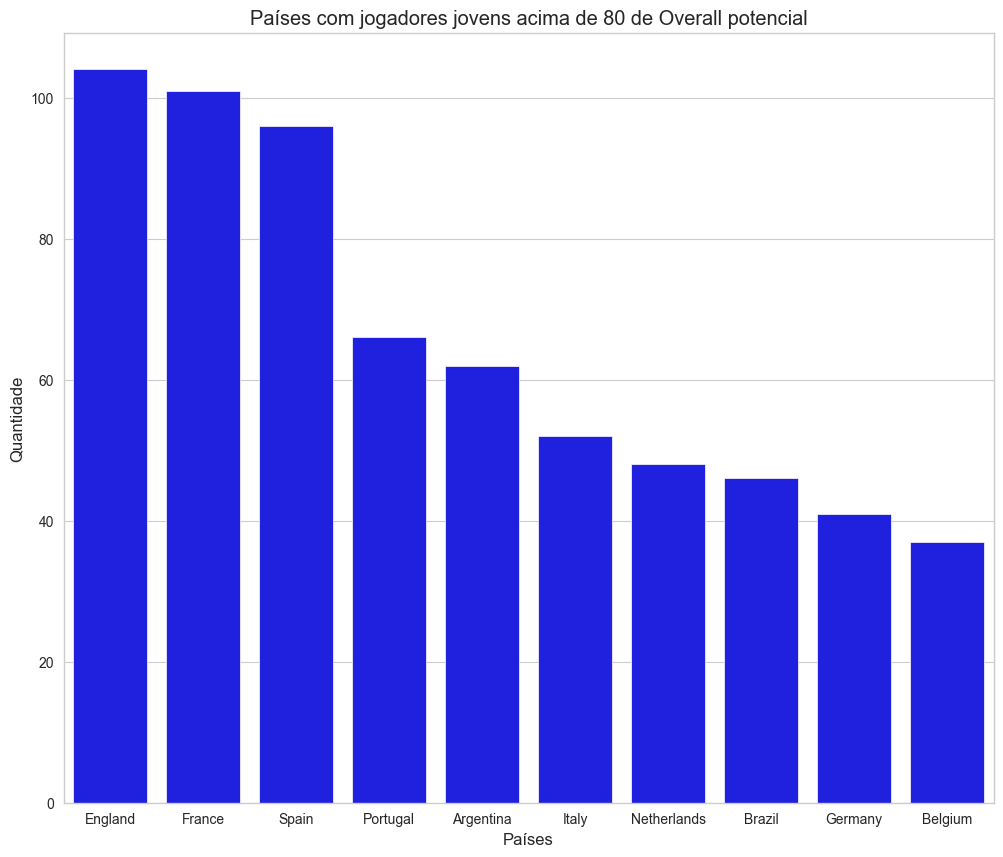

In [69]:
#Criando variável contendo jogadores com no máximo 23 anos e potencial de pelo menos 80 de Overall
prom = df[(df['Potential'] >= 80) & (df['Age'] <= 23)]
prom = prom['Nationality'].value_counts()

#Criando gráfico
sns.barplot(x=prom.head(10).index, y=prom.head(10).values, color='blue')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel("Países")
plt.ylabel("Quantidade")
plt.title("Países com jogadores jovens acima de 80 de Overall potencial")
plt.show()

Agora contando jogadores com potencial de se tornarem grandes estrelas, com 90 ou mais de overall potencial.

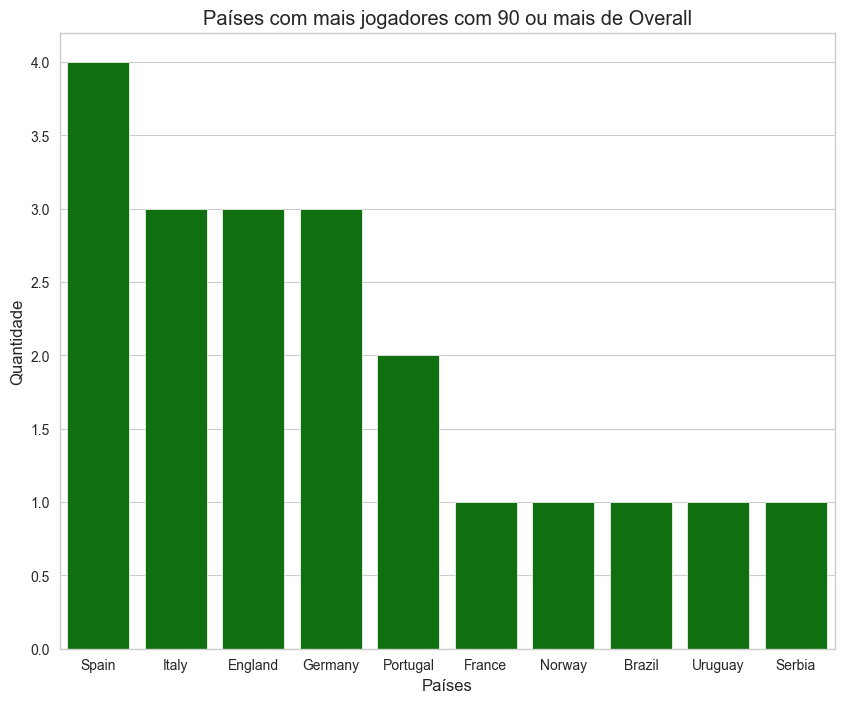

In [73]:
#Criando variável contendo jogadores com no máximo 23 anos e Overall potencial de 90
stars = df[(df['Potential'] >= 90) & (df['Age'] <= 23)]
stars = stars['Nationality'].value_counts()

#Criando gráfico
sns.barplot(x=stars.head(10).index, y=stars.head(10).values, color='green')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.xlabel("Países")
plt.ylabel("Quantidade")
plt.title("Países com mais jogadores com 90 ou mais de Overall")
plt.show()

Vale lembrar que prever o desenvolvimento de um jogador é uma tarefa bem difícil, pois nem sempre eles evoluem como o previsto. Além disso, existem vários jovens surgindo sempre, incluindo em ligas não cadastradas no jogo ou em categorias de base (por isso países com alta revelação de bons jogadores como Argentina e Brasil não aparecem com tanto destaque). Portanto, é errado entender esses dados como extremamente precisos, já que o potencial de um atleta é flexível e imprevisivel.

Agora focaremos mais nos clubes, começando pelos que tem mais jogadores, depois overall médio e folhas salariais. 

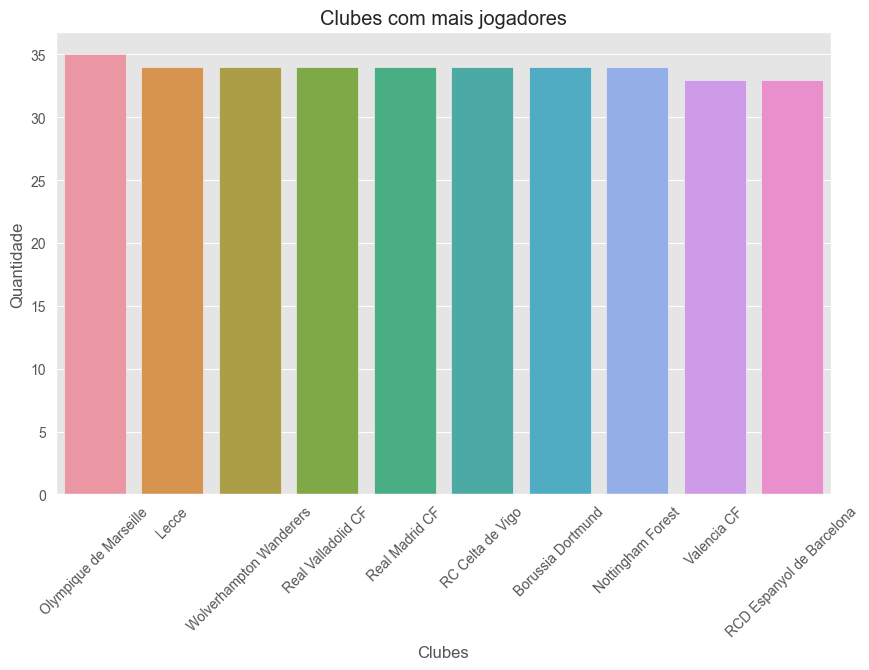

In [180]:
#Excluindo jogadores "Free agent" (Sem clube)
dfd = df[df['Club Name'] != 'Free agent']

#Criando variável que contém a quantidade de jogadores por clube
clubs = dfd['Club Name'].value_counts()

#Criando gráfico
sns.barplot(x=clubs.head(10).index, y=clubs.head(10).values)
sns.color_palette("tab10")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel("Clubes")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.title("Clubes com mais jogadores")
plt.show()

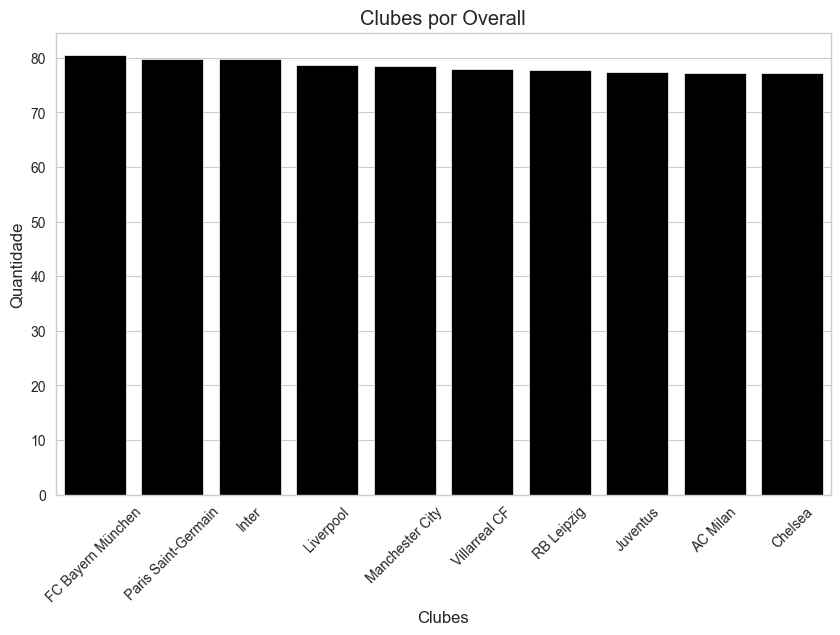

In [171]:
#Aqui excluí um time que ficou com a média alta por ter poucos jogadores
dfe = df[df['Club Name'] != 'AFC Richmond']

#Criando variável com os valores ordenados das clubes com maiores médias de Overall
clubs_ovr = dfe.groupby('Club Name').Overall.mean().sort_values(ascending = False)

#Criando gráfico
sns.barplot(x= clubs_ovr.head(10).index, y = clubs_ovr.head(10).values, color = 'black')
plt.xlabel("Clubes")
plt.ylabel("Quantidade")
plt.title("Clubes por Overall")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xticks(rotation=45)
plt.show()

Veremos os clubes mais valiosos a partir da soma dos salários de todos os jogadores (folha salarial).

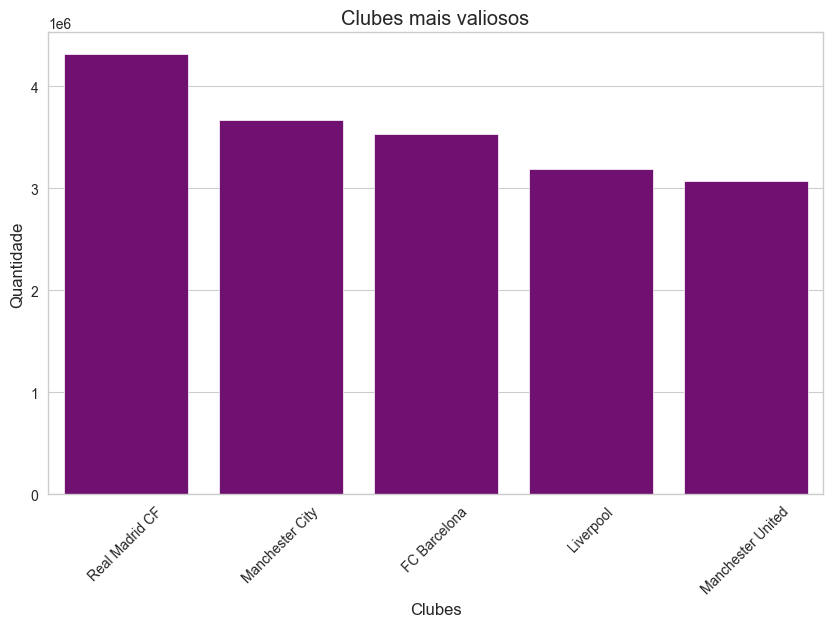

In [141]:
#Criando variável agrupando por clube e ordenando pelo valor da soma dos salários
sals = df.groupby('Club Name')['Wage'].sum().sort_values(ascending = False)

#Criando gráfico
sns.barplot(x = sals.head().index, y = sals.head().values, color = 'purple')
plt.xlabel("Clubes")
plt.ylabel("Quantidade")
plt.title("Clubes mais valiosos")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xticks(rotation=45)
plt.show()


# 5. Análise Multivariada

Nesse tipo de análise vemos as interações entre duas ou mais variáveis, medindo suas correlações e dispersões. Primeiramente, utilizaremos a função "corr" do pandas para ver as correlações entre as colunas. 

A correlação de Pearson (ou simplesmente "correlação") é uma estatística descritiva que mede o grau de associação entre duas variáveis, indo de -1 (correlação negativa) e 1 (correlação perfeita). Quanto mais próximo de 1, maior a correlação entre duas variáveis e, quanto mais próximo de -1 menor ela é. Porém, caso o valor seja próximo ou igual a zero, não há correlação linear entre as variáveis, só podendo existir uma correlação não-linear.

In [22]:
#Calculando a correlação geral do Dataframe
df.corr(numeric_only = True)

,Overall,Potential,Value,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage,Release Clause,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Overall,1.000000,0.660630,0.561642,0.442369,0.033137,0.131420,0.608002,0.843720,0.599129,0.531458,0.252837,0.465057,0.699315,0.674971,0.362324,0.560813,0.395435,0.331967,0.342452,0.520784,0.367168,0.376185,0.416575,0.374162,0.507192,0.457705,0.198758,0.213367,0.254826,0.872789,0.142749,0.552518,0.282737,0.376994,0.353857,0.392187,0.393433,0.311216,0.348038,0.523290,0.331834,0.700583,0.313975,0.266683,0.240499,-0.016593,-0.013655,-0.016764,-0.008318,-0.013110,0.480301,0.447831,0.475105,0.475105,0.475105,0.447831,0.489274,0.472606,0.541536,0.472606,0.451583,0.479747,0.451583,0.428254,0.400783,0.428254,0.044462
Potential,0.660630,1.000000,0.532835,-0.263686,0.017489,-0.003973,0.372469,0.526546,0.497392,0.509867,0.288590,0.281073,0.448553,0.501373,0.180526,0.205186,0.244649,0.227078,0.195108,0.376854,0.228954,0.302802,0.269170,0.207204,0.338221,0.346017,0.220052,0.225343,0.205465,0.539246,0.131779,0.337282,0.087303,0.187141,0.081426,0.232690,0.186599,0.155149,0.226827,0.352757,0.201297,0.427722,0.157665,0.156970,0.142714,-0.039719,-0.040237,-0.040616,-0.037519,-0.038448,0.330398,0.326722,0.339944,0.339944,0.339944,0.326722,0.359247,0.348049,0.370327,0.348049,0.291078,0.294840,0.291078,0.270494,0.227643,0.270494,-0.002057
Value,0.561642,0.532835,1.000000,0.030662,0.008028,0.027106,0.341551,0.468076,0.822262,0.976244,0.205576,0.275255,0.399985,0.406424,0.163425,0.234945,0.230049,0.216025,0.167989,0.304244,0.233128,0.241773,0.253454,0.210590,0.291490,0.273427,0.159242,0.166743,0.170707,0.498667,0.120730,0.303484,0.112006,0.197522,0.129648,0.227479,0.187351,0.145640,0.220491,0.329637,0.190236,0.391234,0.145681,0.131331,0.112650,-0.026560,-0.026122,-0.024337,-0.024374,-0.023352,0.292802,0.279449,0.293238,0.293238,0.293238,0.279449,0.306244,0.295886,0.321575,0.295886,0.252712,0.259591,0.252712,0.234933,0.202809,0.234933,0.011339
Age,0.442369,-0.263686,0.030662,1.000000,0.066684,0.217895,0.246279,0.381901,0.144251,0.025078,-0.144474,0.253085,0.338708,0.215832,0.225600,0.440695,0.124869,0.083500,0.156620,0.144434,0.138420,0.024946,0.141496,0.180766,0.188503,0.089223,-0.135626,-0.125666,-0.019026,0.434187,-0.050771,0.267892,0.236982,0.133382,0.343639,0.155305,0.239378,0.173657,0.092903,0.200278,0.144097,0.348245,0.168584,0.106238,0.093218,0.100972,0.106347,0.102898,0.111290,0.104034,0.132588,0.086605,0.111920,0.111920,0.111920,0.086605,0.108152,0.091072,0.166533,0.091072,0.141274,0.193036,0.141274,0.142184,0.183151,0.142184,0.132966
Height(in cm),0.033137,0.017489,0.008028,0.066684,1.000000,0.754845,-0.382480,-0.123239,0.025430,0.006404,-0.373351,-0.084751,-0.180343,-0.271559,0.037421,0.409400,-0.501520,-0.382351,0.008303,-0.342818,-0.355246,-0.480466,-0.457941,-0.430508,-0.319053,-0.402082,-0.543262,-0.448808,-0.633949,0.001989,-0.767247,-0.169045,0.026047,-0.300078,0.522558,-0.399726,-0.073005,-0.094095,-0.446303,-0.369882,-0.341398,-0.184355,-0.099398,-0.110241,-0.111459,0.366696,0.364998,0.362319,0.361931,0.363832,-0.368263,-0.480017,-0.438248,-0.438248,-0.438248,-0.480017,-0.449370,-0.464597,-0.387355,-0.464597,-0.321388,-0.212100,-0.321388,-0.271875,-0.088695,-0.271875,0.369929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Como temos muitas linhas e colunas, fica difícil conseguir analisar bem essa tabela de correlação, mas veremos as mais importantes mais à frente. Por enquanto olharemos os gráficos de dispersão de algumas variáveis relevantes.

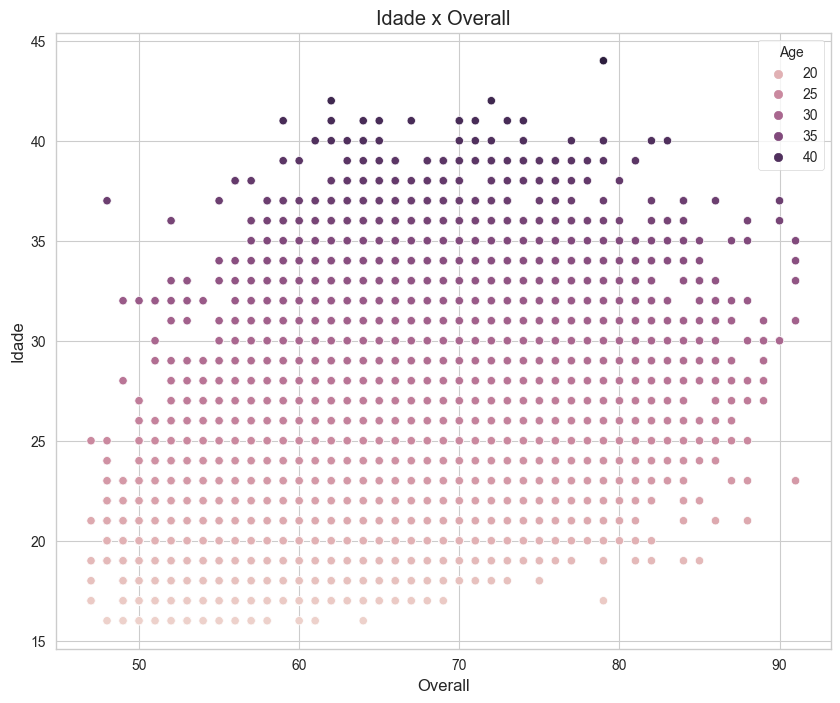

In [103]:
#Criando gráfico de dispersão entre overall e idade
sns.scatterplot(df, x = 'Overall', y = 'Age', hue = 'Age')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel("Overall")
plt.ylabel("Idade")
plt.title("Idade x Overall")
plt.show()


Aqui observamos que existe uma tendência natural, e esperada, de crescimento do Overall conforme o aumento da idade. Apenas um jogador com menos de 25 anos possui mais de 90 de rating e somente um com mais de 40 anos tem um rating próximo a 80. 

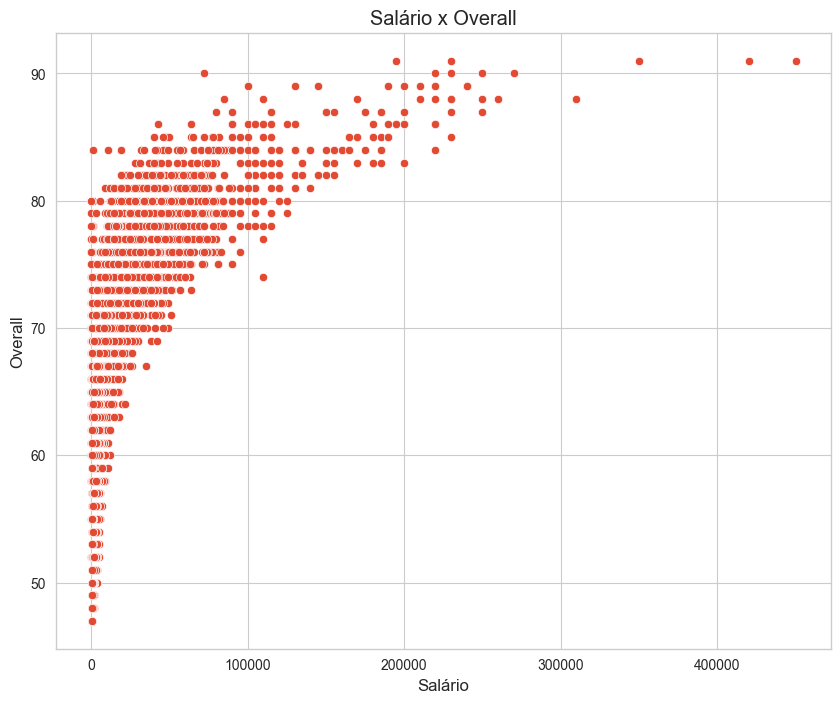

In [108]:
#Criando gráfico de dispersão entre salário e overall
sns.scatterplot(df, x = 'Wage', y='Overall')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.xlabel("Salário")
plt.ylabel("Overall")
plt.title("Salário x Overall")
plt.show()


Nesta dispersão, também vemos uma natural correlação positiva entre Overall e Salário, apesar de alguns valores discrepantes dos demais.

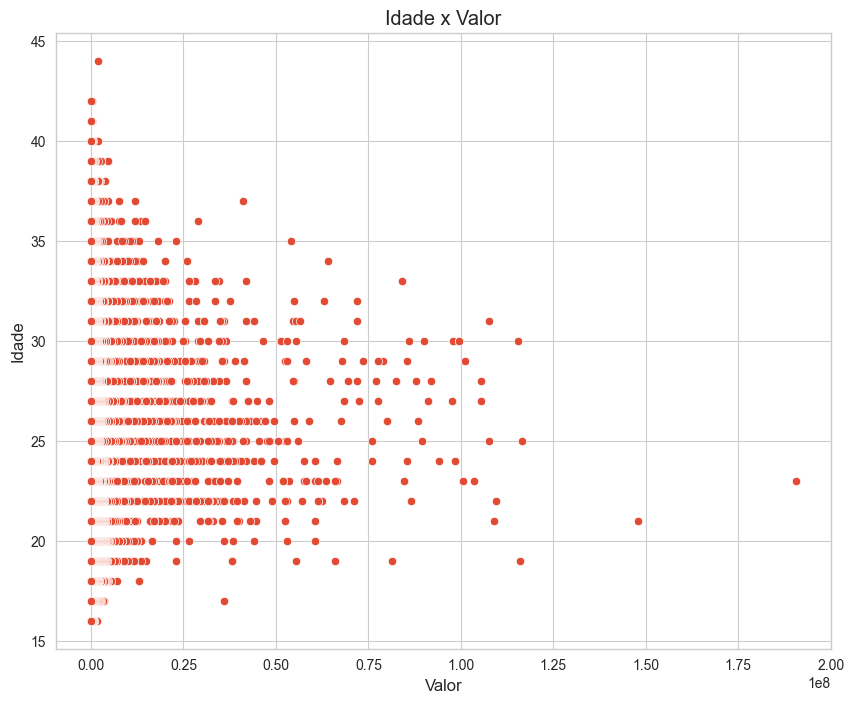

In [116]:
#Criando gráfico
sns.scatterplot(df, x='Value', y = 'Age')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel("Valor")
plt.ylabel("Idade")
plt.title("Idade x Valor")
plt.show()


Na relação entre Idade e Valor, constatamos que existe uma correlação linear um pouco mais baixa do que se poderia imaginar. Com o passar do tempo, é natural que os atletas percam seu valor de mercado, já que seus atributos físicos costumam diminuir. Esse fenômeno ocorre aqui, mas não de forma linear, o que nos faz crer que existe uma correlação não-linear entre as duas variáveis. Outro fator que contribui para isso é que Overall e Idade não são necessariamente proporcionais, ou seja, parte considerável dos jogadores mantém suas qualidades por mais tempo.

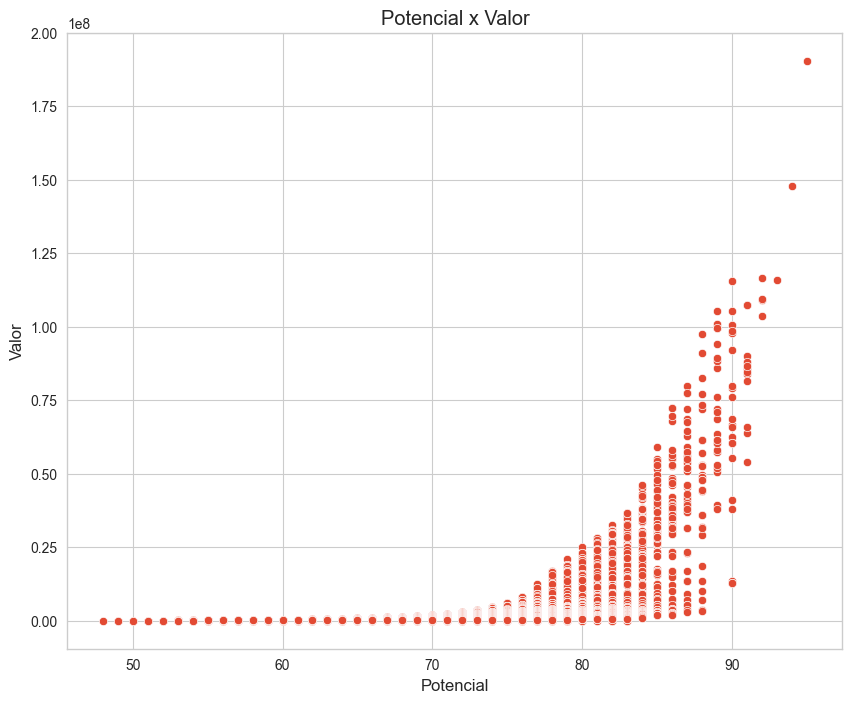

In [118]:
#Criando gráfico
sns.scatterplot(df, x='Potential', y = 'Value')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel("Potencial")
plt.ylabel("Valor")
plt.title("Potencial x Valor")
plt.show()


Apesar de alguns valores discrepantes, aqui também não vemos nada anormal, jogadores com maior potencial valem mais no mercado.

Para checarmos a distribuição salarial dos 5 clubes mais valiosos, usaremos o boxplot. Basicamente, as extremidades são os valores maiores e menores , a mediana dos valores é o traço dentro do retângulo ("box") e extremidades dele são o primeiro (parte inferior) e terceiro (parte superior) quartis, que representam - respectivamente-, 25% e 75% dos valores.

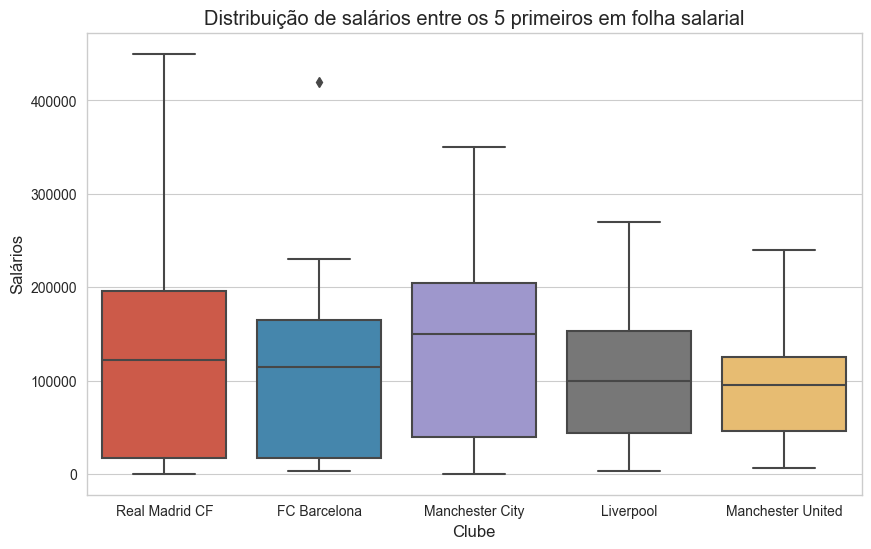

In [158]:
#Criando Dataframe apenas com o jogadores dos 5 clubes mais valiosos
df_clbs = df_clubs = df[df['Club Name'].isin(['Real Madrid CF', 'Manchester City', 'FC Barcelona',
                                               'Liverpool', 'Manchester United'])]

#Criando gráfico boxplot
sns.boxplot(data=df_clbs, x ='Club Name', y = 'Wage')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel("Clube")
plt.ylabel("Salários")
plt.title('Distribuição de salários entre os 5 primeiros em folha salarial')
plt.show()


O ponto fora do gráfico Boxplot do Barcelona representa um Outlier (Valor discrepante em relação aos demais), o que indica que existe uma certa disparidade salarial no clube. O gráfico do Real Madrid também possui pontos bem altos, porém, como não existem Outliers, entendemos que a diferença entre os salários não é tão grande e, caso exista, não é responsável por apenas um jogador como no caso do Barcelona.

# 6. Respondendo as perguntas e hipóteses restantes

Agora que já temos uma boa visão geral sobre o conjunto de dados, podemos tentar buscar respostas para nossas perguntas e hipóteses criadas no início da análise. Primeiro tentando identificar quais são os jogadores mais habilidosos e velozes do game.

<b> -> Quais são os jogadores mais rápidos e habilidosos? </b>

Para isso, escolheremos colunas que representam atributos relacionados a velocidade e habilidade geral.
Como: Pace Total, Dribbling Total, Dribbling, etc...

In [131]:
hab = df.loc[:, ['Known As','Nationality', 'Pace Total', 'Dribbling Total', 'Dribbling', 'Acceleration', 'Sprint Speed', 
                 'Agility', 'Reactions', 'BallControl', 'Balance']]
hab.rename(columns = {'Known As': 'Jogador', 'Nationality':'Nacionalidade'}, inplace = True)
hab['Habilidade Geral'] = (hab['Dribbling Total']  + hab['Reactions'] + hab['Dribbling'] + hab['BallControl'] + hab['Balance'])/5
hab['Velocidade Geral'] = (hab['Pace Total'] +  hab['Acceleration'] + hab['Agility'] + hab['Reactions'] + hab['Sprint Speed'])/5


In [132]:
top_hab = hab.sort_values(by = 'Habilidade Geral', ascending = False)
top_hab.head(10).loc[:, ['Jogador', 'Nacionalidade', 'Habilidade Geral']]

# JOGADORES COM MAIS HABILIDADE GERAL

,Jogador,Nacionalidade,Habilidade Geral
0,L. Messi,Argentina,93.8
36,M. Verratti,Italy,90.8
23,Bernardo Silva,Portugal,90.8
11,Neymar Jr,Brazil,90.4
5,M. Salah,Egypt,90.4
4,K. Mbappé,France,90.0
43,Thiago,Spain,89.0
29,L. Modrić,Croatia,88.6
48,R. Mahrez,Algeria,88.4
49,P. Dybala,Argentina,88.4


In [133]:
top_spd = hab.sort_values(by = 'Velocidade Geral', ascending = False)
top_spd.head(10).loc[:, ['Jogador', 'Nacionalidade', 'Velocidade Geral']]

# JOGADORES COM MAIS VELOCIDADE GERAL

,Jogador,Nacionalidade,Velocidade Geral
4,K. Mbappé,France,95.4
63,Vinícius Jr.,Brazil,92.2
15,S. Mané,Senegal,91.0
47,R. Sterling,England,91.0
56,K. Coman,France,90.8
141,A. Davies,Canada,90.6
5,M. Salah,Egypt,90.6
402,J. Frimpong,Netherlands,90.0
155,O. Dembélé,France,89.6
1109,F. Acheampong,Ghana,89.6


<b> -> Jogadores brasileiros (ou sulamericanos) são naturalmente mais habilidosos que os de outras nações. </b>

Com esses dados de habilidade geral, que inclui os atributos: Dribbling Total (Média dos atributos de drible), Reactions (Velocidade de reação), Dribbbling (Drible), Ball Control (Controle de Bola) e Balance (Controle de bola após uma disputa - influencia o drible), podemos validar ou não esta hipótese.

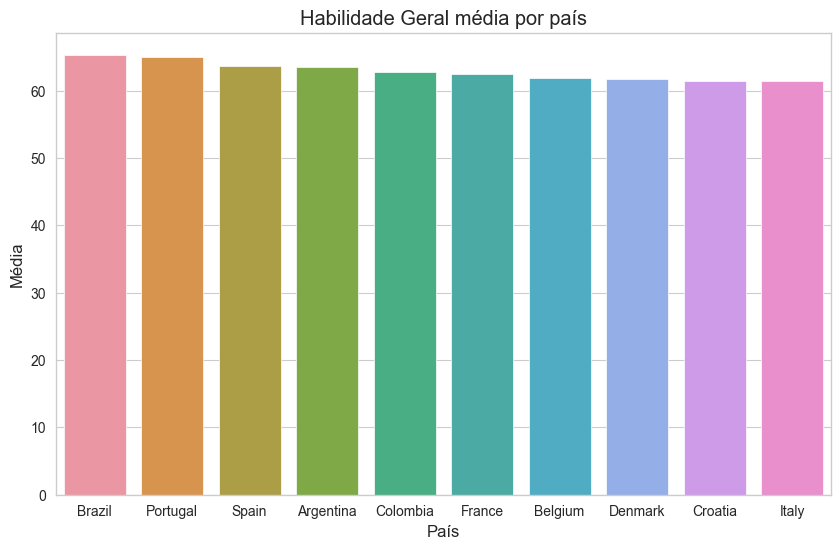

In [159]:
#Criando dataframe com países e quantidade de jogadores
dfg = df.groupby("Nationality").size().reset_index(name='counts')
dfg = dfg[dfg['counts'] > 150]

#Lista contendo os países com mais de 150 jogadores
g = dfg.iloc[:, 0]

#Criando dataframe com as médias de habilidade geral por países que possuem mais de 150 jogadores
nac_hab = top_hab[top_hab['Nacionalidade'].isin(g)]
nac_hab = nac_hab.groupby('Nacionalidade')['Habilidade Geral'].mean()
nac_hab = nac_hab.sort_values(ascending = False)

#Criando gráfico 
sns.barplot(df, x = nac_hab.head(10).index, y= nac_hab.head(10).values)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Habilidade Geral média por país')
plt.ylabel('Média')
plt.xlabel("País")
plt.show()


Como podemos ver, <b> a hipótese é verdadeira </b>, os jogadores brasileiros aparecem (com uma leve diferença) em primeiro no gráfico, que também contém mais dois países sulamericanos no top 5 (Argentina e Colômbia). 

<b> -> Jogadores com maiores TotalStats (Soma de todos os atributos) possuem Overalls mais altos. </b>

Isso é lógico de se pensar, já que a nota de Overall reflete a qualidade dos atributos do jogador. Mas será que essas duas métricas são realmente proporcionais?

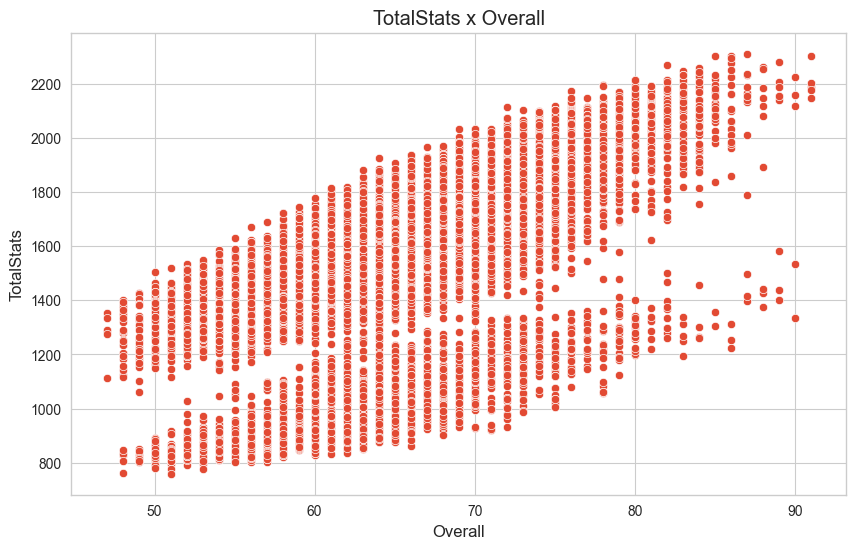

In [160]:
#Criando Dataframe só com as colunas TotalStats e Overall
sta_ovr = df.loc[:, ['TotalStats', 'Overall']]

#Criando gráfico de dispersão
sns.scatterplot(df, x='Overall', y='TotalStats')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('TotalStats x Overall')
plt.show()


In [33]:
#Calculando a correlação geral
sta_ovr.corr()

,TotalStats,Overall
TotalStats,1.000000,0.608002
Overall,0.608002,1.000000


Aplicando o scatter plot entre Overall e TotalStats e usando o atributo "trendline = ols" (Quando usei o plotly), observamos que há uma relação linear (estimada pela linha) entre essas duas características com o R-quadrado aproximadamente igual a 37% (0,369). Neste caso, esse valor representa o quão bem a variação do Overall acompanha a variação do TotalStats. Já a correlação indica a força da relação entre as variáveis, variando entre -1 (Correlação Negativa) e 1 (Correlação Positiva), que foi de 0,608. Conclusão: existe uma correlação, mas ela é menor do que naturalmente se espera.

Já que não tivemos uma correspondência tão grande entre TotalStats e os ratings dos jogadores, podemos verificar o mesmo para o atributo BaseStats, que é equivalente a soma dos atributos 	Pace Total (Média dos atributos de velocidade),	Shooting Total (Média dos atributos de chute), Passing Total (Média dos atributos de passe), Dribbling Total (Média dos atributos de drible), Defending Total (Média dos atributos de defesa) e Physicality Total (Média dos atributos físicos). 

Como o BaseStats só leva em conta poucos dados (ao contrário do TotalStats), é natural que observemos uma correlação mais próxima de 1 (positiva) e um gráfico de dispersão que evidencie isso.

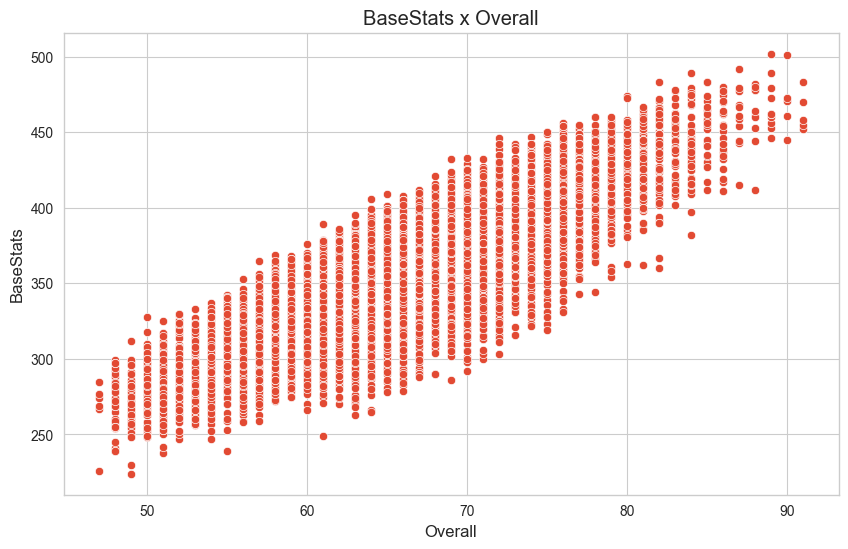

In [161]:
#Criando gráfico de dispersão
sns.scatterplot(df, x = 'Overall', y = 'BaseStats')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('BaseStats x Overall')
plt.show()



In [35]:
#Criando Dataframe só com BaseStats e overall
Bsta = df.loc[:, ['BaseStats', 'Overall']]

#Calculando correlação
Bsta.corr()

,BaseStats,Overall
BaseStats,1.00000,0.84372
Overall,0.84372,1.00000


Agora, com BaseStats, vemos uma relação mais consistente entre as variáveis. Através da trendline, observamos que o R-quadrado é de 0.711 (71,1%), o que indica uma boa relação linear e, pela função corr, uma correlação de 0.84 (0.2 maior que a da TotalStats). Com isso, concluímos que esse atributo reflete mais a qualidade dos atletas no game.

<b> -> Atributos que mais contribuem com o rating (Overall) </b>


In [163]:
#Criando Dataframes com as colunas de atributos e a de Overall
att = df.iloc[:, 21:61]
ovr = df['Overall']

#Juntando os Dataframes
att = pd.concat([ovr, att], axis = 1)

#Calculando a correlação entre Overall e atributos e ordenando os valores
corrs1 = att.corr(numeric_only = True)
corrs = corrs1['Overall'].sort_values(ascending = False)


In [164]:
#Vendo os 10 maiores valores
corrs.head(10)

Overall              1.000000
Reactions            0.872789
Composure            0.700583
Passing Total        0.699315
Dribbling Total      0.674971
Physicality Total    0.560813
Shot Power           0.552518
Vision               0.523290
Short Passing        0.520784
LongPassing          0.507192
Name: Overall, dtype: float64

Como resultado, temos que os atributos com maior influência no rating de um jogador são: <b> Reactions </b> (Velocidade de reação), <b> Composure </b> (Controle mental), <b> Passing Total </b> (Média de atributos de passe) e <b> Dribbling Total </b>(Média de atributos de drible). Após isso, Physicality Total (Média dos atributos físicos), Shot Power (Força de chute), dentre outros. 
A conclusão que temos é que, além de atributos físicos, os melhores jogadores também possuem uma boa mentalidade e habilidade emocional. 

In [165]:
#Vendo os 10 menores valores
corrs.tail(10)

Pace Total                0.252837
Sliding Tackle            0.240499
Sprint Speed              0.213367
Acceleration              0.198758
Balance                   0.142749
Goalkeeper Positioning   -0.008318
Goalkeeper Reflexes      -0.013110
Goalkeeper Handling      -0.013655
Goalkeeper Diving        -0.016593
 GoalkeeperKicking       -0.016764
Name: Overall, dtype: float64

Entre os atributos menos correlacionados, naturalmente estão os que pertencem aos goleiro, mas também os relacionados a velocidade.

Por fim, criei uma mapa de calor para entendermos a correlação geral entre os atributos e o Overall, onde as cores mais claras representam uma correlação mais forte.

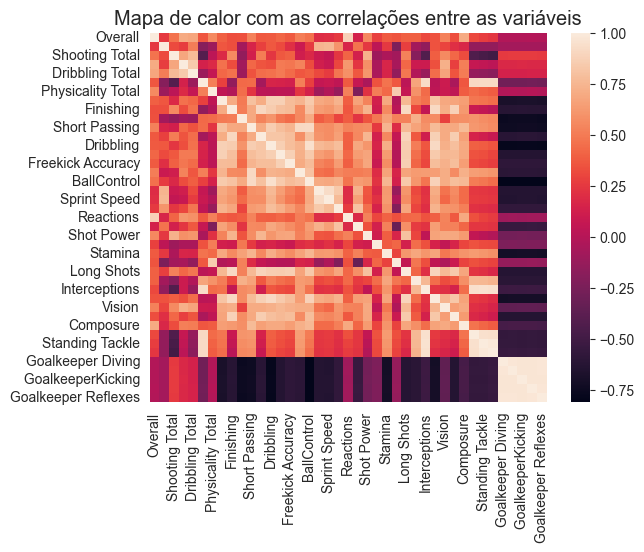

In [167]:
#Criando um mapa de calor
sns.heatmap(corrs1)
plt.title('Mapa de calor com as correlações entre as variáveis')
plt.show()



# 7. Considerações finais

Apesar de não ser um conjunto de dados complexo e um pouco distante da realidade e seus problemas, acredito que foi possível tirar bons insigths e testar algumas coisa com eles. Além de uma análise exploratória, é possível também aplicar técnicas mais avançadas de estatística e machine learning para, por exemplo, fazer previsões sobre o salário ou o valor de algum jogador baseado em seus atributos e características. Além de sistemas de recomendação das melhores escalações ou de jogadores para serem comprados pelos usuários em suas gameplays e análise para a descobertas de jogadores com potencial de crescimento elevado e que podem se tornam atletas de elite no cenário internacional.

Creio que atingi todos os objetivos que criei e utilizei as melhores maneiras de visualização de dados que tenho conhecimento (ponto que pode ser melhorado ainda mais). Por ser meu projeto desse tipo, fiquei com bastante dúvida sobre o que colocar e aceito sugestões e feedback sobre minha análise. 
Pretendo fazer mais projetos como esse, além de outros voltados a machine learning (regressão, classificação, clusterização, etc..) no futuro a partir da continuação dos meus estudos sobre data science. Muito obrigado por ler e até mais! ;)